# To run:

Use an IDE that will allow you to open a Jupyter Notebook
For example, use Anaconda Navigator to open Visual Studio Code
You may need to select a kernel to run the program

In [117]:
import pandas as pd
import numpy as np
import random


In [118]:
#DATA EXPLORATION
data = pd.read_csv('../feature_extraction/features.csv')

In [119]:
type(data)

pandas.core.frame.DataFrame

In [120]:
data.shape

(40, 5)

In [121]:
# Check for data imbalance
# "no" is speech
# "yes" is music
data.groupby(["Label"]).count()

,fileName,Avg_Energy,Spectral_Centroid,Zero_Crossing
Label,,,,
no,20,20,20,20
yes,20,20,20,20


In [122]:
# Replace labels with 0 for speech and 1 for music
data["Label"] = (data["Label"] == "yes").astype(int)

# Check to make sure it worked
data.head()

,fileName,Avg_Energy,Spectral_Centroid,Zero_Crossing,Label
0,sp1.wav,0.000523,1854.469204,0.057359,0
1,sp2.wav,0.000452,1634.124033,0.045363,0
2,sp3.wav,0.000500,1680.345306,0.048798,0
3,sp4.wav,0.106305,1527.499066,0.052835,0
4,sp5.wav,0.000713,2021.764421,0.068368,0


In [123]:
# Separate the features (x) from the labels (y)
y = data["Label"]                 # Label - sound or music
x = data.drop(["Label"], axis=1)  # Features

In [124]:
# For reproducable results, set the seed
# random_seed = 45 
random_seed = 22 
np.random.seed(random_seed)
random.seed(random_seed)

# Split into training and testing data 
from sklearn.model_selection import train_test_split

# The directions say to use 1/3 of the data for testing and 2/3 for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=random_seed)

In [125]:
x_train.shape


(26, 4)

In [126]:
x_test.shape

(14, 4)

In [127]:
# The directions say to indicate which of the files are used for training
print(x_train.sort_index()["fileName"])

0      sp1.wav
2      sp3.wav
3      sp4.wav
4      sp5.wav
5      sp6.wav
6      sp7.wav
7      sp8.wav
8      sp9.wav
9     sp10.wav
13    sp14.wav
14    sp15.wav
15    sp16.wav
17    sp18.wav
18    sp19.wav
20     mu1.wav
23     mu4.wav
24     mu5.wav
25     mu6.wav
26     mu7.wav
28     mu9.wav
29    mu10.wav
30    mu11.wav
31    mu12.wav
32    mu13.wav
35    mu16.wav
36    mu17.wav
Name: fileName, dtype: object


In [128]:
x_train

,fileName,Avg_Energy,Spectral_Centroid,Zero_Crossing
3,sp4.wav,0.106305,1527.499066,0.052835
30,mu11.wav,0.006398,1030.011228,0.022409
6,sp7.wav,0.008305,1251.928995,0.029717
17,sp18.wav,0.003599,1007.823345,0.022738
32,mu13.wav,0.016869,1214.985381,0.025760
25,mu6.wav,0.011002,1392.615335,0.023033
15,sp16.wav,0.035551,2761.785009,0.078090
5,sp6.wav,0.000318,889.584765,0.021203
23,mu4.wav,0.006938,1653.226770,0.042597
35,mu16.wav,0.017262,1745.315889,0.051440


In [129]:
y_train

3     0
30    1
6     0
17    0
32    1
25    1
15    0
5     0
23    1
35    1
9     0
2     0
7     0
26    1
24    1
13    0
28    1
14    0
18    0
29    1
31    1
8     0
20    1
36    1
0     0
4     0
Name: Label, dtype: int32

In [130]:
x_test

,fileName,Avg_Energy,Spectral_Centroid,Zero_Crossing
39,mu20.wav,0.000671,1836.124785,0.046168
38,mu19.wav,0.001807,2167.598472,0.065885
21,mu2.wav,0.009673,1736.441325,0.036696
22,mu3.wav,0.007851,1548.419317,0.034848
33,mu14.wav,0.036653,1227.084409,0.015267
1,sp2.wav,0.000452,1634.124033,0.045363
12,sp13.wav,0.177041,1188.009661,0.035488
16,sp17.wav,0.061655,2752.099550,0.077733
37,mu18.wav,0.003944,1800.905516,0.051270
10,sp11.wav,0.000553,1779.976549,0.050720


In [131]:
y_test

39    1
38    1
21    1
22    1
33    1
1     0
12    0
16    0
37    1
10    0
27    1
11    0
19    0
34    1
Name: Label, dtype: int32

In [132]:
# Remove the filename, leaving only the features
x_train = x_train.drop(["fileName"], axis=1)
x_test = x_test.drop(["fileName"], axis=1)

In [133]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)

# https://scikit-learn.org/stable/modules/sgd.html#sgd
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

SVC()

In [134]:
type(model)

sklearn.svm._classes.SVC

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(x_test) > 0.5).astype("int32")
cf_matrix = confusion_matrix(y_test, y_pred) # Comparing what the model predicted vs. the true labels of speech or music


In [136]:
type(y_pred)

numpy.ndarray

In [137]:
type(cf_matrix)

numpy.ndarray

[Text(0, 0.5, 'Not Music'), Text(0, 1.5, 'Music')]

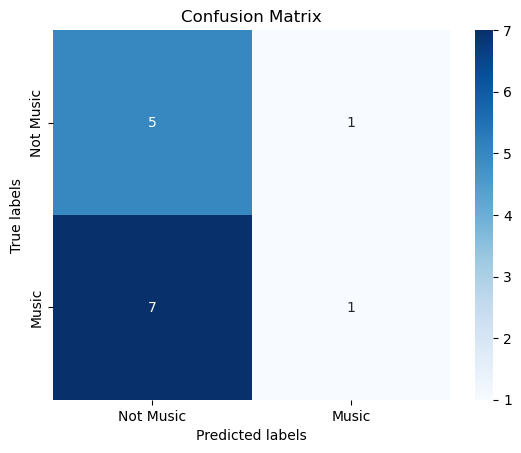

In [138]:
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Music', 'Music']); ax.yaxis.set_ticklabels(['Not Music', 'Music'])

In [139]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# True postives

print('Precision: %.6f' % precision_score(y_test, y_pred, zero_division=1))
print('Recall = %.6f' % recall_score(y_test, y_pred, zero_division=1))

Precision: 0.500000
Recall = 0.125000
